# Введение

## меры изменчивости

In [ ]:
# standard deviation
import numpy as np

a = np.array([1, 5, 2, 7, 1, 9, 3, 8, 5, 9])
n = len(a)
mu = sum(a) / n
D = sum((a - mu)**2) / (n-1)
std = D**(1/2)
print(f'std={std:0.2f}') # standard deviation

std=3.16


## квартили распределения, график box-plot

mean=170.4, median=170.5


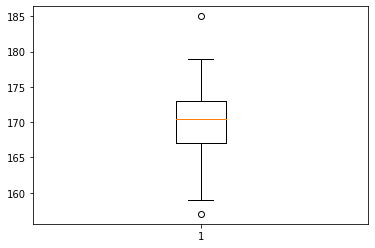

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([157, 159, 161, 164, 165, 166, 167, 167,
167, 168, 169, 169, 170, 170, 170, 171, 171, 172, 172,
172, 172, 173, 173, 175, 175, 177, 178, 178, 179, 185])
print(f'mean={np.mean(x)}, median={np.median(x)}')

plt.boxplot(x)
plt.show()

## Нормальное распределение (Normal distribution)

mean=170.4, median=170.5


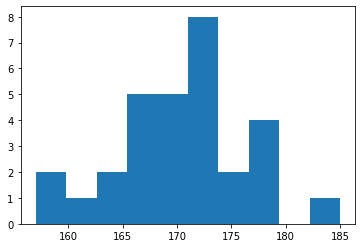

after standartization
mean=-0.00, median=0.02


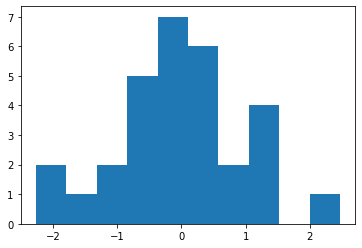

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([157, 159, 161, 164, 165, 166, 167, 167,
167, 168, 169, 169, 170, 170, 170, 171, 171, 172, 172,
172, 172, 173, 173, 175, 175, 177, 178, 178, 179, 185])
print(f'mean={np.mean(x)}, median={np.median(x)}')
plt.hist(x)
plt.show()

#Стандартизация (z-преобразование)
print('after standartization')
x = (x - np.mean(x)) / np.std(x)
print(f'mean={np.mean(x):0.2f}, median={np.median(x):0.2f}')
plt.hist(x)
plt.show()

## Центральная предельная теорема (Central limit theorem)

Рассчитайте стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100

In [ ]:
from math import sqrt

D = 4
n = 100

se = sqrt(D) / sqrt(n)
print(f'se={se}')

se=0.2


## Доверительные интервалы для среднего (confidence interval)

Если бы мы многократно извлекали выборки одинакового размера из генеральной совокупности, в каждой выборке рассчитывали среднее значение и для него свой 95%-ный доверительный интервал (т.е. mu+-1.96se), то в 95% всех случаев такой интервал включал бы в себя среднее значение генеральной совокупности
mu - среднее выборки
se - стандарная ошибка среднего (standard error)
Рассчитаем доверительный интервал для наших выборочных данных:

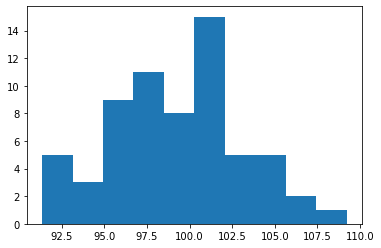

se=0.5
95%-ный доверительный интервал=(99.02, 100.98)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

mu, std, n = 100, 4, 64
x = np.random.normal(mu, std, n)
plt.hist(x)
plt.show() 

se = std /  sqrt(n)
print(f'se={se}')
print(f'95%-ный доверительный интервал={mu - 1.96 * se, mu + 1.96 * se}')

99% всех наблюдений лежит в диапазоне mu+-2.58sigma (se - для рассчета доверительных интервалов выборочных данных)

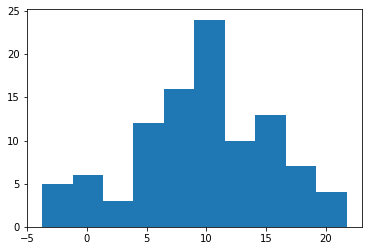

se=0.5
99%-ный доверительный интервал=(8.71, 11.29)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

mu, std, n = 10, 5, 100
x = np.random.normal(mu, std, n)
plt.hist(x)
plt.show() 

se = std /  sqrt(n)
print(f'se={se}')
print(f'99%-ный доверительный интервал={mu - 2.58 * se, mu + 2.58 * se}')

## Идея статистического вывода, p-уровень значимости (p-value)

Идея статистического вывода
Предположим, что для выздоровления от некоторого заболевания в среднем требуется 20 дней. Однако мы разработали препарат и хотим проверить, можно ли сократить этот срок. Мы набрали группу пациентов из 64 человек и опробовали на них новый метод лечения. Оказалось, что средний срок выздоровления сократился до 18,5 дней при стандартном отклонении 4. Нужно определить: это влияние нового препарата или случайность?

Давайте введём две конкурирующих гипотезы:
Нулевая гипотеза H0 будет говорить о том, что никакого влияния препарат не оказывает и среднее M=20
Альтернативная гипотеза H1 утверждает, что препарат сокращает время выздоровления и среднее M=18,5 дней

Предположим, что верна нулевая гипотеза. Тогда в соответствии с центральной предельной теоремой, если бы мы многократно повторяли наши исследования, то выборочные средние распределились нормальным образом вокруг среднего генеральной совокупности со стандартной ошибкой среднего se = std / sqrt(n)

In [ ]:
from math import sqrt

M, n, mu, std = 20, 64, 18.5, 4

se = std / sqrt(n)
print(f"se={se}")

se=0.5


Ответим на вопрос: на сколько наше выборочное среднее отклонилось от предполагаемого среднего генеральной совокупности в единицах стандартного отклонения (sigma)?
Для этого сделаем z-преобразование

In [ ]:
z = (mu - M) / se
print(f"z={z}")

z=-3.0


Это означает, что, если бы среднее ген совокупности (M) равнялось 20, то наше выборочное среднее (mu) отклонилось от M на -3*sigma

Воспользовавшись сервисом https://gallery.shinyapps.io/dist_calc/
установив 
mean=0, 
standard deviation = 1
both tails: a = -3, b = 3

Получим, что вероятность получить такое отклонение (3*sigma в обе стороны) P = 0.0027

Подведем итоги: на первом этапе мы предположили, что верно нулевая гипотеза. Если это так, то все выборочные средние распределились бы нормальным образом вокруг среднего ген совокупности (M=20). Но при этом вероятность получить наше выборочное среднее оказалась равно примерно 0.003.
Таким образом, основная идея статистического вывода заключается в следующем:

Сначала мы допускаем, что верна нулевая гипотеза (т.е. никаких различий и взаимосвязей в генеральной совокупности нет). После этого мы сможем рассчитывать, что мы получили такие или ещё более выраженные различия абсолютно случайно. Эта вероятность в статистике называется p-уровень значимости. С помощью этого показателя можно выбрать более состоятельную гипотезу. Чем меньше p-уровень значимости, тем больше у исследователя оснований отклонить нулевую гипотезу. Считается, если p<0.05, можно смело принимать альтернативную гипотезу. Однако, если p>0.05, считается, что у нас недостаточно оснований отклонить нулевую гипотезу

## Идея статистического вывода с помощью доверительных интервалов (p-value vs confidence interval)

Использование доверительных интервалов зачастую рассматривают, как альтернативный способ проверки гипотез. В нашем случае, если значение 20 (предполагаемое среднее значение в генеральной совокупности) не будет принадлежать 95% доверительному интервалу, рассчитанному по выборочным данным, у нас будет достаточно оснований отклонить нулевую гипотезу. Проверьте согласуются ли результаты двух этих подходов: рассчитайте 95% доверительный интервал для среднего значения, на примере с тестированием нового препарата.

n = 64,  sd = 4,   M = 18.5

In [ ]:
from math import sqrt

mu, std, n = 18.5, 4, 64

se = std /  sqrt(n)
print(f'se={se}')
print(f'95%-ный доверительный интервал={mu - 1.96 * se, mu + 1.96 * se}')

se=0.5
95%-ный доверительный интервал=(17.52, 19.48)


20 не принадлежит доверительному интервалу - отклоняем H0

# Сравнение средних

## сравнение двух средних, t-критерий Стьюдента (Student's t-test)

Процесс денатурации ДНК представляет разрушение водородных связей между двумя цепями этой молекулы и очень сильно зависит от воздействующей на них температуры.

При сравнении двух видов были получены следующие значения температуры плавления образца:

In [40]:
mu_1, std_1, n_1 = 89.9, 11.3, 20
mu_2, std_2, n_2 = 80.7, 11.7, 20

Предположим 2 гипотезы:

H0 - М1=М2, оба вида принадлежат одной генеральной совокупности

H1 - М1!=М2, оба вида принадлежат разным генеральным совокупностям

Проверяем H0: разница M0-M1 должна распределиться нормально с средним в нуле

Определим на сколько сигма отклоняется разница наших выборочных средних от разницы средних генеральных совокупностей (0):

In [47]:
from math import sqrt

se = sqrt((std_1**2) / n_1 + (std_2**2) / n_2)
print(f'se = {se:.01f}')

t = (mu_1 - mu_2) / se
print(f't = {t:.01f}')
print(f'Degrees of freedom={n_1 + n_2 - 2}')

se = 3.6
t = 2.5
Degrees of freedom=38


Воспользовавшись сервисом https://gallery.shinyapps.io/dist_calc/ выбрав t-распределение и установив Degrees of freedom=38, both tails: a = -2.5, b = 2.5

получим p-value: P(X < -2.5 or X > 2.5) = 0.0169, что меньше 0,05